# Credit Risk Modelling

# Table of Contents

1. [Import Library](#1)
2. [Data Preparation](#2)
    - [Load Dataset](#3)
    - [Dealing Missing Values](#4)
    - [Detecting and Handling Outliers](#5)
    - [Exploratory Data Analysis](#6)
    - [Encoding Categorical Data](#7)

# Import Library<a id='1'></a>

In [41]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Data Preparation<a id='2'></a>

## Load Dataset<a id='3'></a>

In [42]:
# Read file as dataframe
df_loan = pd.read_csv('CR_Loan.csv')

# Print first five rows
df_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Deskripsi Data :

- person_age : umur peminjam
- person_income : pendapatan peminjam
- person_home_ownership : kepemilikan tempat tinggal
- person_emp_length : jangka waktu
- loan_intent : intensitas pinjam
- loan_grade : tingkatan peminjam 
- loan_amnt : jumlah pinjaman
- loan_int_rate  : persentase pinjam 
- loan_status : status pinjaman
- loan_percent_income : bunga pinjaman
- cb_person_default_on_file : record gagal bayar
- cb_person_cred_hist_length : record sering pinjam

In [43]:
# View info data
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Dealing Missing Values<a id='4'></a>

In [44]:
# Looking for missing columns
null_cols = df_loan.columns[df_loan.isnull().any()]
df_loan[null_cols].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [45]:
# Summary statistics of missing columns
df_loan[['person_emp_length','loan_int_rate']].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


In [46]:
# Handling missing values
df_loan['person_emp_length'].fillna(df_loan['person_emp_length'].median(), inplace=True)
df_loan['loan_int_rate'].fillna(df_loan['loan_int_rate'].mean(), inplace=True)
df_loan.isnull().sum().any()

False

## Detecting and Handling Outliers<a id='5'></a>

In [47]:
# summary statistics of numeric columns
df_loan.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


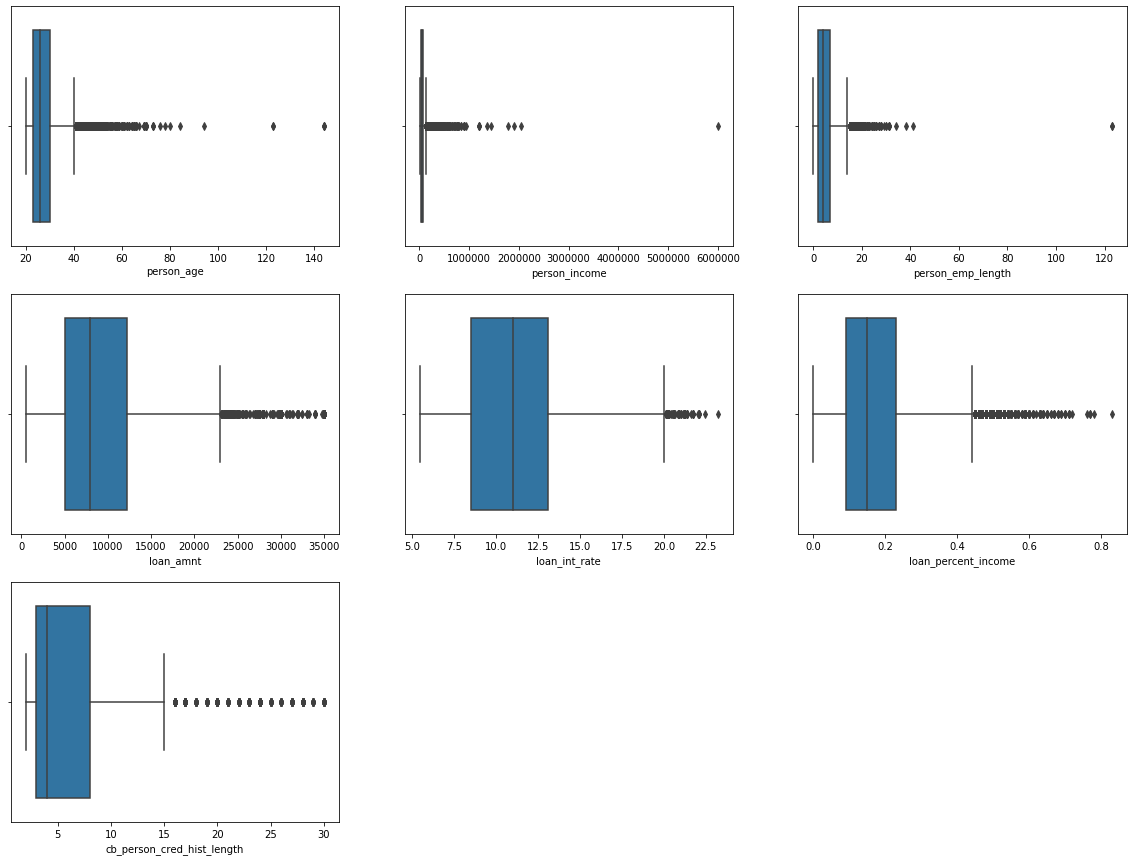

In [48]:
# Detecting outliers
num_cols = list(df_loan.select_dtypes(exclude='object').columns)
data_numerical = df_loan[num_cols].drop('loan_status', axis=1)
plt.figure(figsize=(20,15))
for i in range(0, len(data_numerical.columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data_numerical.iloc[:,i])

In [49]:
# Define upper bound and lower bound
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1

# Define maksimum value
maksimum = Q3 + (1.5*IQR)
print('Nilai Batas Maksimum :')
print(maksimum)
# Define minimum value
minimum = Q1 - (1.5*IQR)
print('\nNilai Batas Minimum :')
print(minimum)

Nilai Batas Maksimum :
person_age                        40.50
person_income                 140250.00
person_emp_length                 14.50
loan_amnt                      23000.00
loan_int_rate                     20.04
loan_percent_income                0.44
cb_person_cred_hist_length        15.50
dtype: float64

Nilai Batas Minimum :
person_age                       12.50
person_income                -22550.00
person_emp_length                -5.50
loan_amnt                     -5800.00
loan_int_rate                     1.56
loan_percent_income              -0.12
cb_person_cred_hist_length       -4.50
dtype: float64


In [50]:
# Handling outliers
lebih_dari = (df_loan > maksimum)
kurang_dari = (df_loan < minimum)
df_loan = df_loan.mask(lebih_dari, maksimum, axis=1)
df_loan_baru = df_loan.mask(kurang_dari, minimum, axis=1)
# df_loan_baru = df_loan.copy()

# See new summary statistics
df_loan_baru.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.440625,62419.212793,4.682192,9407.679322,11.009872,0.218164,0.168808,5.705779
std,5.271083,31810.265995,3.717753,5813.035232,3.075847,0.413006,0.102361,3.710454
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,40.500000,140250.000000,14.500000,23000.000000,20.040000,1.000000,0.440000,15.500000


## Exploratory Data Analysis<a id='6'></a>

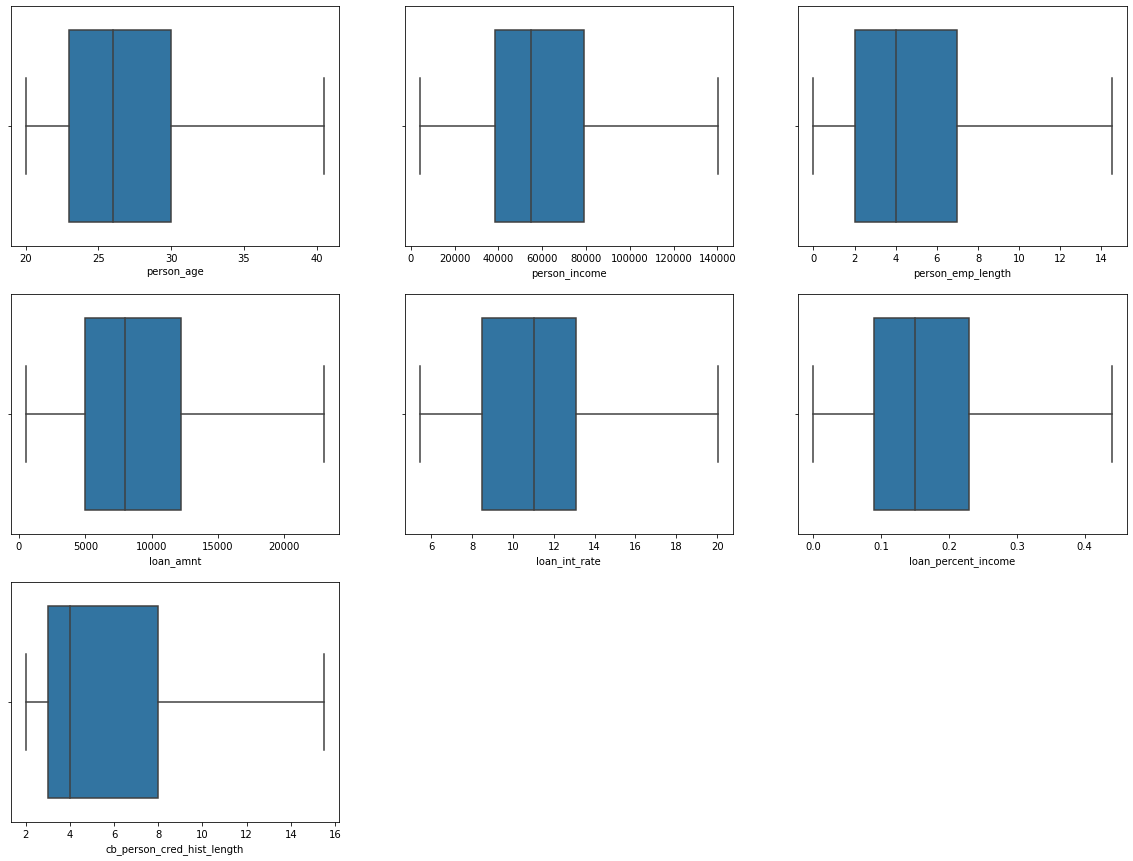

In [51]:
# Checking clear data outlier using visualization
num_cols1 = list(df_loan_baru.select_dtypes(exclude='object').columns)
data_numerical1 = df_loan_baru[num_cols1].drop('loan_status', axis=1)
plt.figure(figsize=(20,15))
for i in range(0, len(data_numerical1.columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data_numerical1.iloc[:,i])

Dari grafik diatas dapat disimpulkan bahwa :
- Umur peminjam rentang 23-30 tahun
- Jangka waktu pinjam berkisar 2-7 tahun
- Pendapatan perbulan peminjam 40000 - 80000
- Jumlah pinjaman berkisar antara 5000 - 12500
- Persentase sering pinjam 8.5% - 13%
- Bunga pinjaman sekitar 1% - 2.2%
- Histori pernah pinjam 3-8 kali

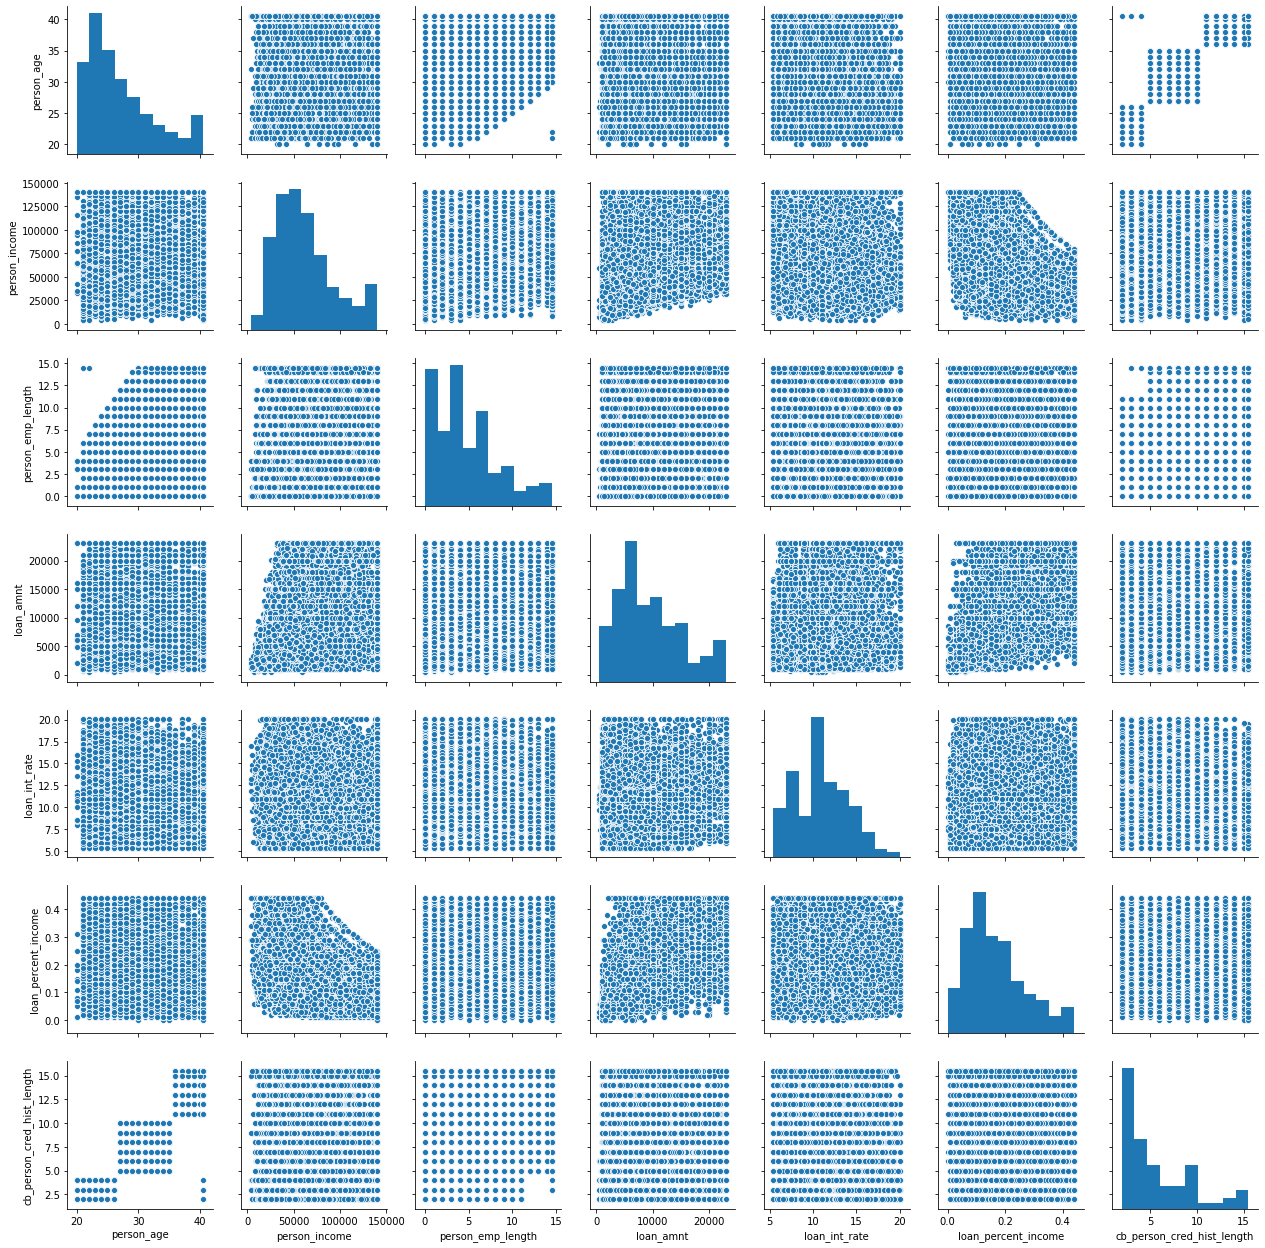

In [52]:
# See relationships numerical data
sns.pairplot(data_numerical1)

In [53]:
# Summary statistics of categorical columns
df_loan_baru.describe(include=['O'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


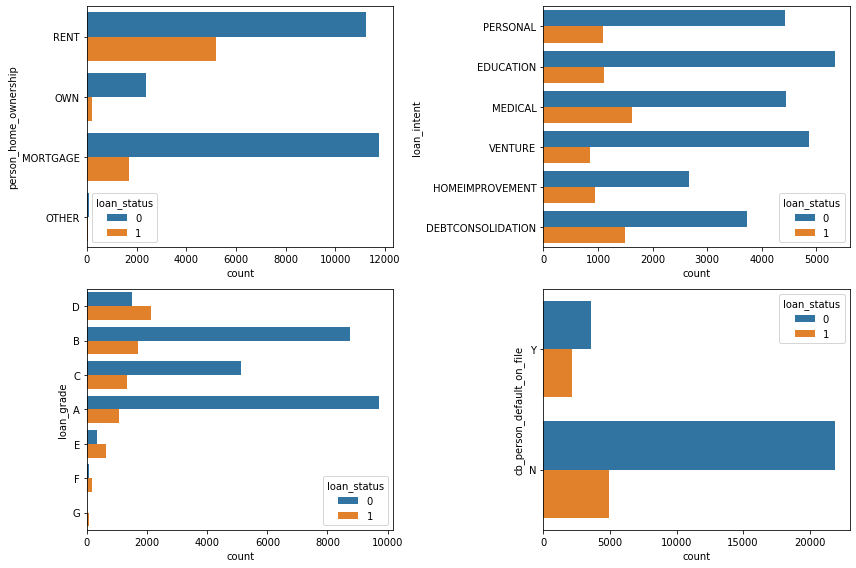

In [54]:
# Bivariate analysis on target columns
cat_cols = list(df_loan_baru.select_dtypes(include='object').columns)
data_categorical = df_loan_baru[cat_cols]
data_categorical['loan_status'] = df_loan['loan_status']
plt.figure(figsize=(12,8))
for i in range(0, len(data_categorical.columns)-1):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=data_categorical.iloc[:,i], hue=data_categorical['loan_status'])
    plt.tight_layout()

Dari grafik diatas dapat disimpulkan :
- Kebanyakan orang yang meminjam memiliki tempat tinggal jenis RENT atau MORTAGE.
- Rata-rata orang yang peminjam akan sukses membayar kembali tergantung tujuan pinjamnya.
- Grade A-C lebih sukses dalam membayar pinjaman dibandingkan grade D-G.
- Record peminjam yang sukses membayar akan membayar kembali pada pinjaman berikutnya.

In [55]:
# Check counts of target columns
df_loan_baru['loan_status'].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

Dari data diatas menunjukkan bahwa 78% peminjam sukses membayar kembali (NON DEFAULT), sedangkan sisanya 22% peminjam gagal bayar (DEFAULT).

## Encoding Categorical Data<a id='7'></a>

In [56]:
# Store numerical variable
df_loan_num = df_loan_baru.select_dtypes(exclude=['object'])
# Store categorical variable (nominal)
df_loan_cat = pd.get_dummies(df_loan_baru[['person_home_ownership','loan_intent']])
# Concatenate into dataframe
df_loan_prep = pd.concat([df_loan_num, df_loan_cat], axis=1)
# Encode categorical variable (ordinal)
grades = {'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
cb_persons ={'N':0,'Y':1}
df_loan_prep['loan_grade'] = df_loan_baru['loan_grade'].map(grades)
df_loan_prep['cb_person_default_on_file'] = df_loan_baru['cb_person_default_on_file'].replace(cb_persons)
# Print new first rows data
df_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade,cb_person_default_on_file
0,22.0,59000,14.5,23000,16.02,1,0.44,3.0,0,0,0,1,0,0,0,0,1,0,4,1
1,21.0,9600,5.0,1000,11.14,0,0.10,2.0,0,0,1,0,0,1,0,0,0,0,6,0
2,25.0,9600,1.0,5500,12.87,1,0.44,3.0,1,0,0,0,0,0,0,1,0,0,5,0
3,23.0,65500,4.0,23000,15.23,1,0.44,2.0,0,0,0,1,0,0,0,1,0,0,5,0
4,24.0,54400,8.0,23000,14.27,1,0.44,4.0,0,0,0,1,0,0,0,1,0,0,5,1


In [57]:
# Check dimension of data
df_loan_prep.shape

(32581, 20)

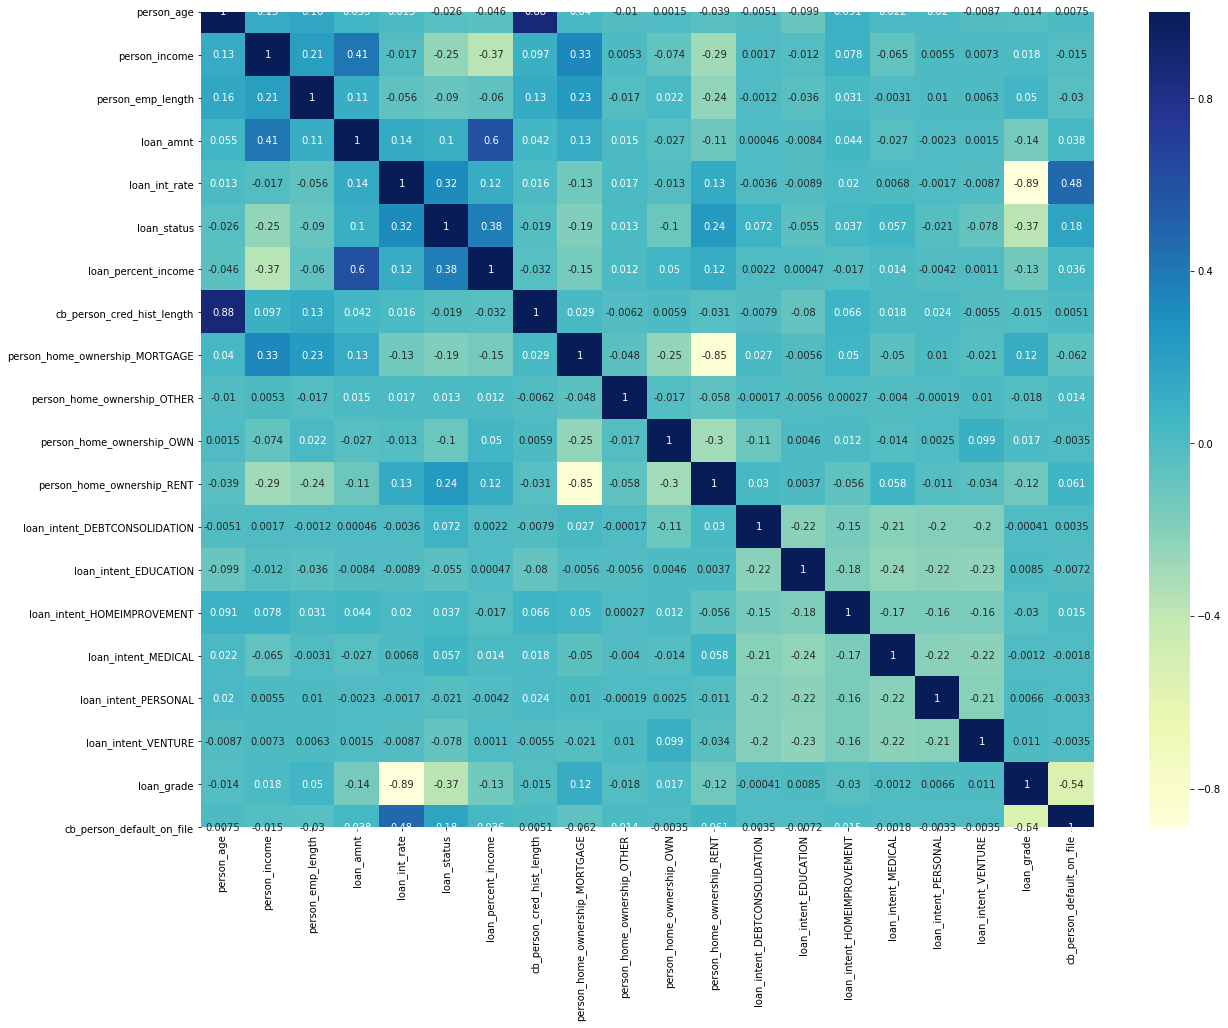

In [58]:
# See correlation
df_loan_corr = df_loan_prep.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_loan_corr, annot=True, cmap='YlGnBu')

In [59]:
# # selecting features if correlation with target > +/-0.1
# df_loan_corr[abs(df_loan_corr['loan_status']) > 0.1]['loan_status']

In [60]:
# Save clean data for modelling
df_loan_prep.to_csv('CR_Loan_Preprocessing.csv', index=False)